# Machine Learning project:
## Implementation of Support Vector Machine & Artificial Neural Network

Farkhod Muradov - aj23syd012____Tran Khanh Ngoc Le - aj23syd008

__NOTE:

+ This notebook has been revised after in-class pressentation
+ It does contain all codes including the old and revised
+ The new updates are tagged with "[Revised]". 

__Why do we revise?

+ As in our conclusion, we stated that the models would perform more efficient if we assign the proper parameters to them. Therefore, we thought that what if we do the tunning for each model before evaluation.

__What do we revise?

+ We performed a tunning for each model and evaluated their performance basing on the result after tunning instead of the initial attempt (as the one we presented)

In [1]:
# Loading dataset

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

dataset = pd.read_csv("hf_dataset.csv")
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### DATA DESCRIPTION

+ age: Age of the patient

+ anaemia: Haemoglobin level of patient (Boolean)

+ creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

+ diabetes: If the patient has diabetes (Boolean)

+ ejection_fraction: Percentage of blood leaving the heart at each contraction

+ high_blood_pressure: If the patient has hypertension (Boolean)

+ platelets: Platelet count of blood (kiloplatelets/mL)

+ serum_creatinine: Level of serum creatinine in the blood (mg/dL)

+ serum_sodium: Level of serum sodium in the blood (mEq/L)

+ sex: Sex of the patient

+ smoking: If the patient smokes or not (Boolean)

+ time: Follow-up period (days)

+ DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)

[Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

# Exploration Data Analysis

In [2]:
# Checking data shape
dataset.shape

(299, 13)

In [3]:
# Checking missing values 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203'), Text(0, 0, '96')]

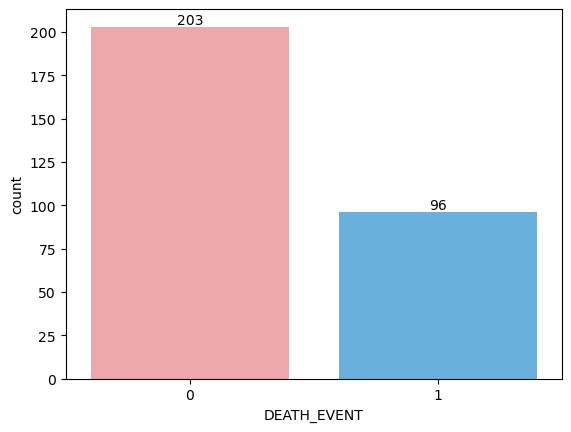

In [4]:
# Checking data skeness of each attribute

cols= ["#f89ca3","#56b5f0"]
ax = sns.countplot(x= dataset["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])


In [5]:
# Univariate analysis for statiscal description and data pattern
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### Findings

+ The attributes "creatinine_phosphokinase" and "serum creatinine" exhibit significant skewness. 
+ In contrast, the other features largely display a normal distribution, as their means are aligned with their corresponding medians.

<Axes: >

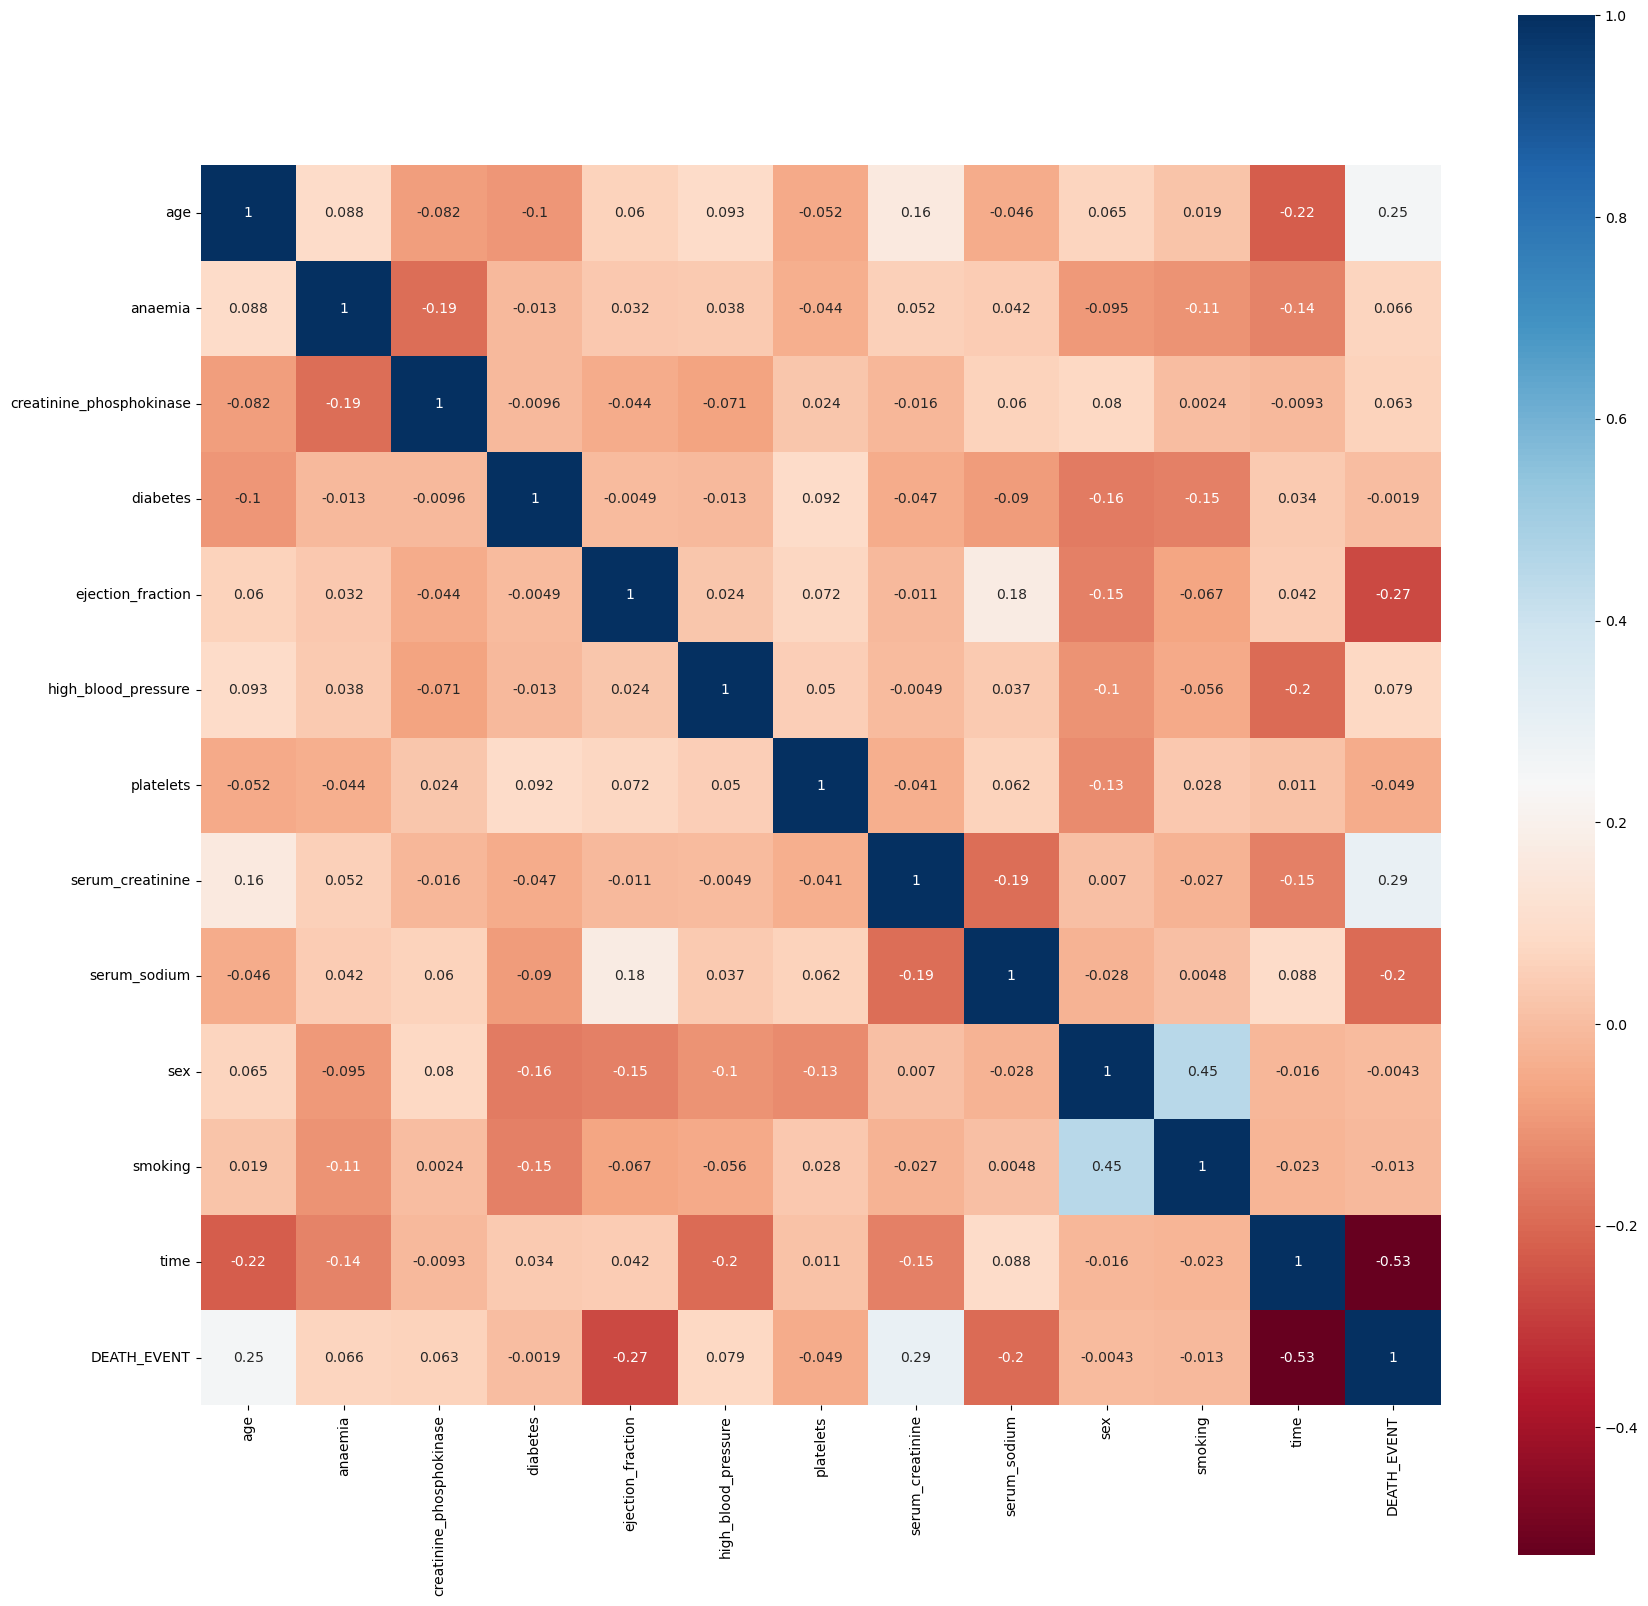

In [6]:
# Bivariate analysis for data correlation

cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = dataset.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= 'RdBu',annot=True, square=True)

#### Findings

+ "Time" is a pivotal factor, as early diagnosis of cardiovascular problems is crucial for prompt intervention, which in turn lowers the risk of severe outcomes. This is evident from the inverse relationship observed.

+ The prominence of "serum_creatinine" stands out as a critical feature. A higher concentration of serum (a key component of blood) in the blood stream aids in the heart's operation.

+ The influence of "ejection_fraction" on the target variable is noteworthy, which is not surprising considering it essentially measures the heart's efficiency.

+ The inverse relationship pattern also suggests that the efficiency of the heart diminishes with age.

Text(0.5, 1.0, 'Distribution Of Age')

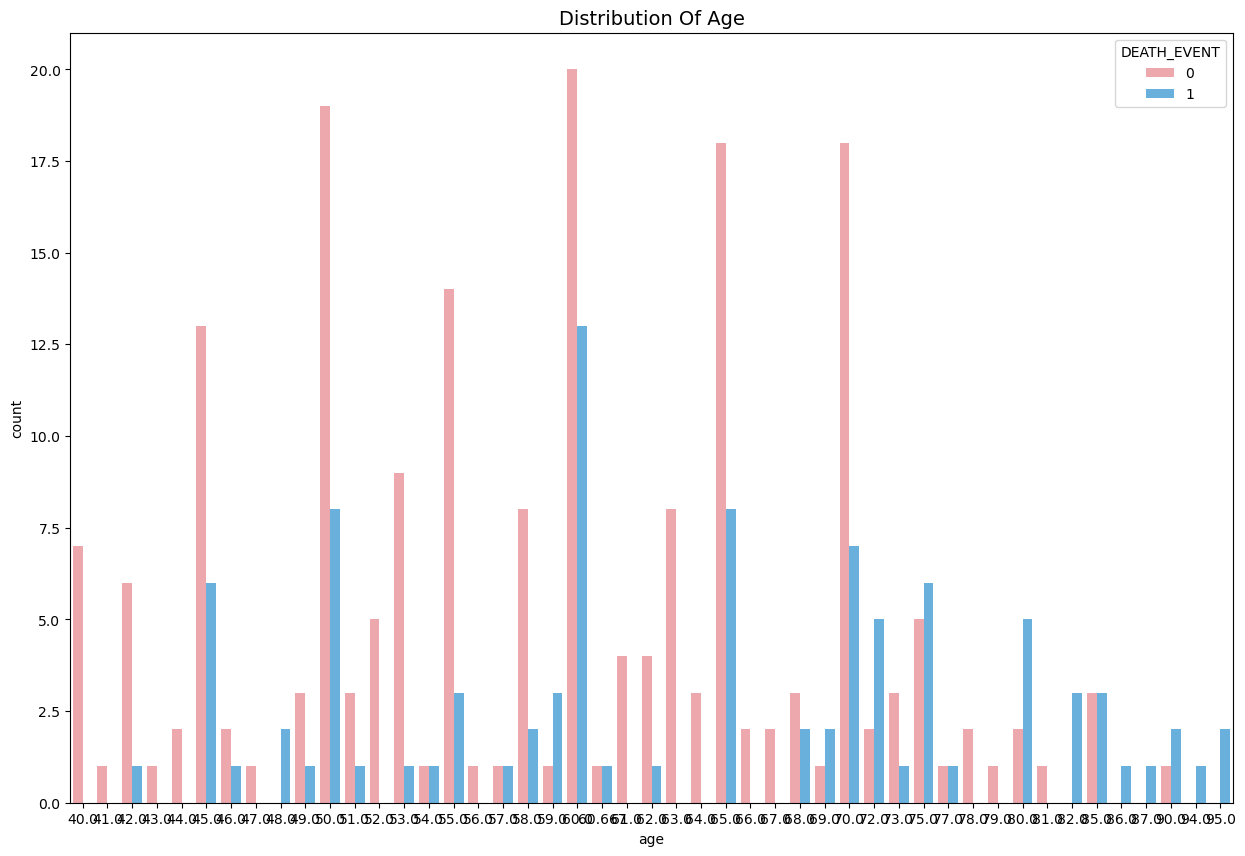

In [7]:
# Assessing the age distribution in relation to the recorded deaths

plt.figure(figsize=(15,10))
Days_of_week=sns.countplot(x=dataset['age'],data=dataset, 
                           hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", fontsize=14)


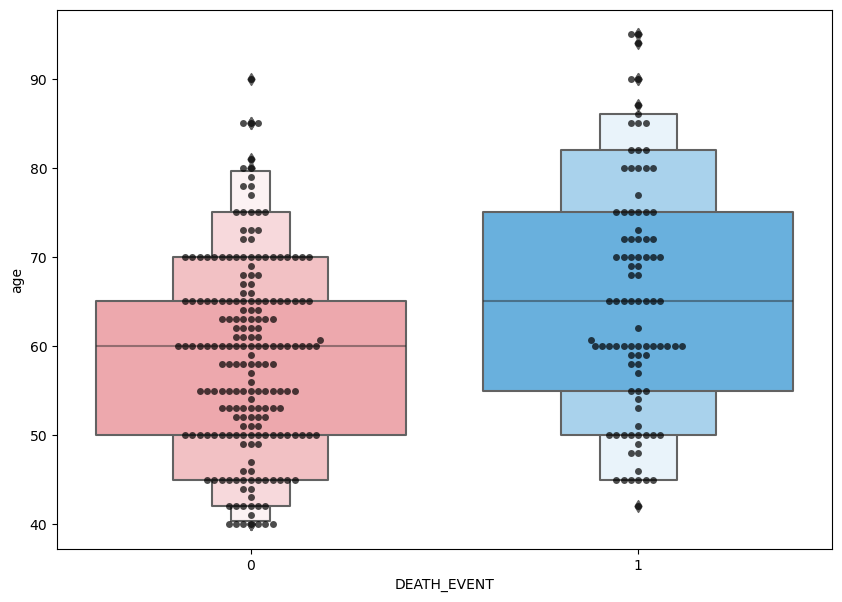

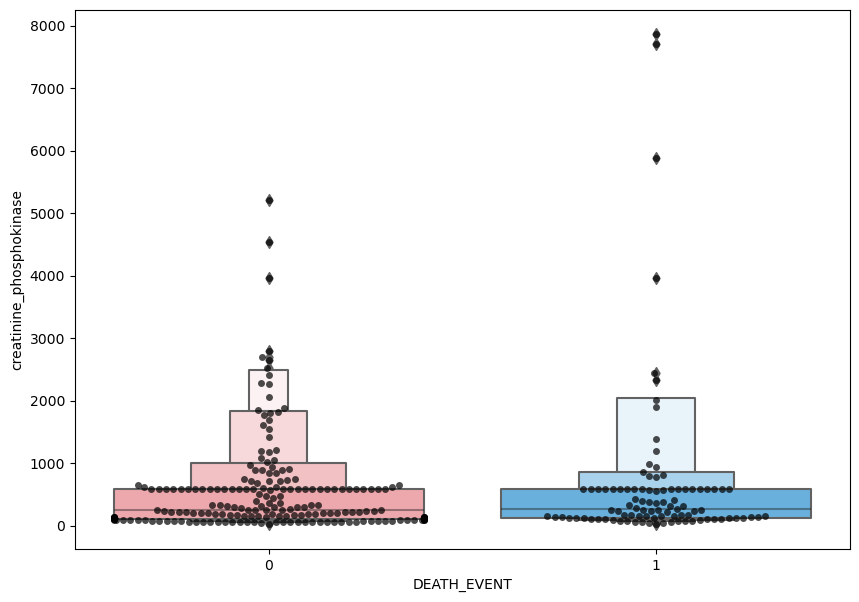

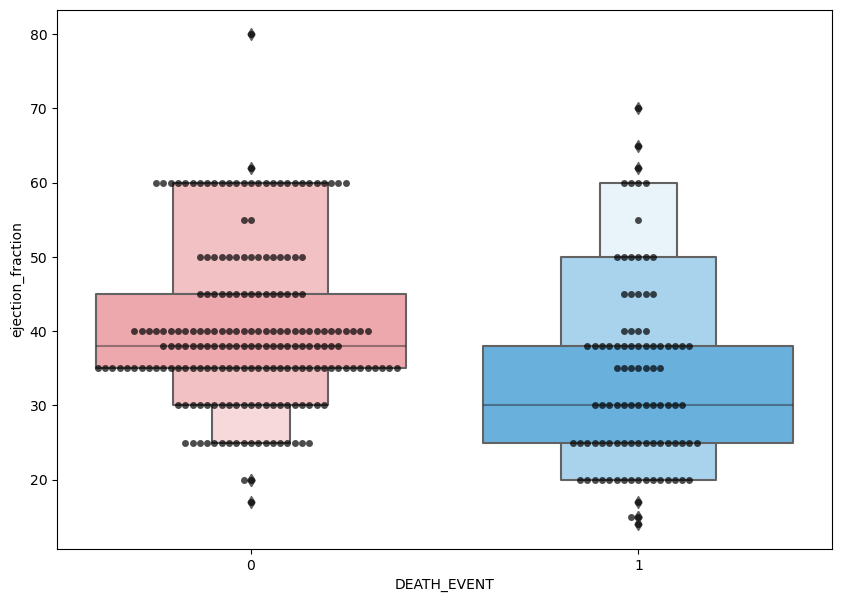

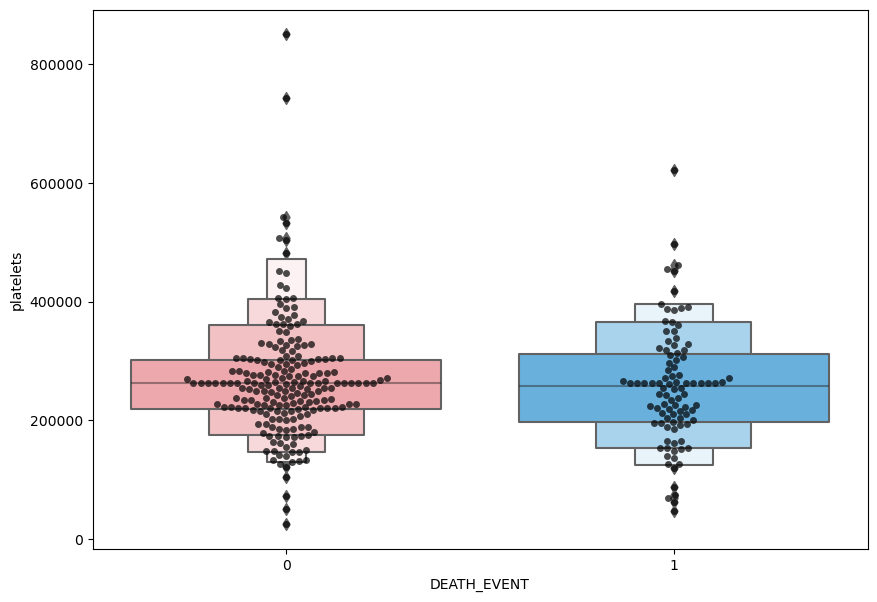

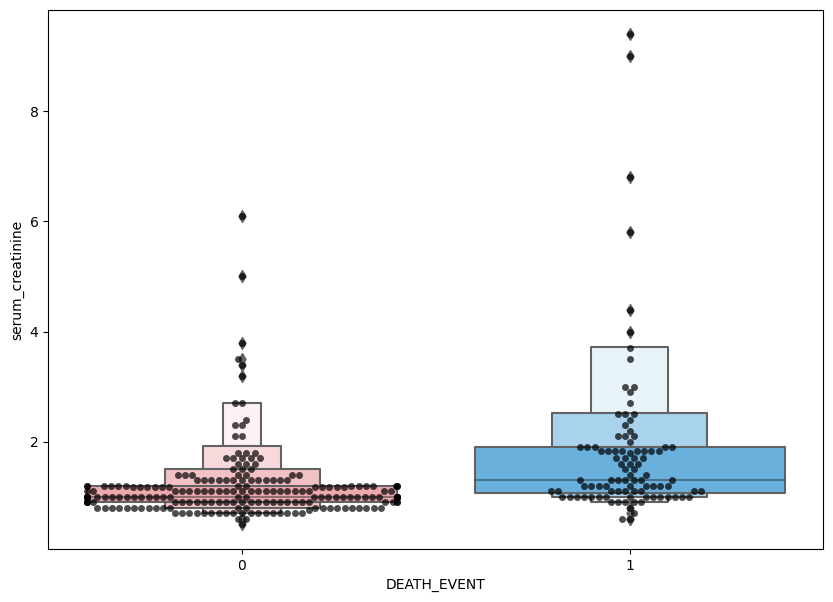

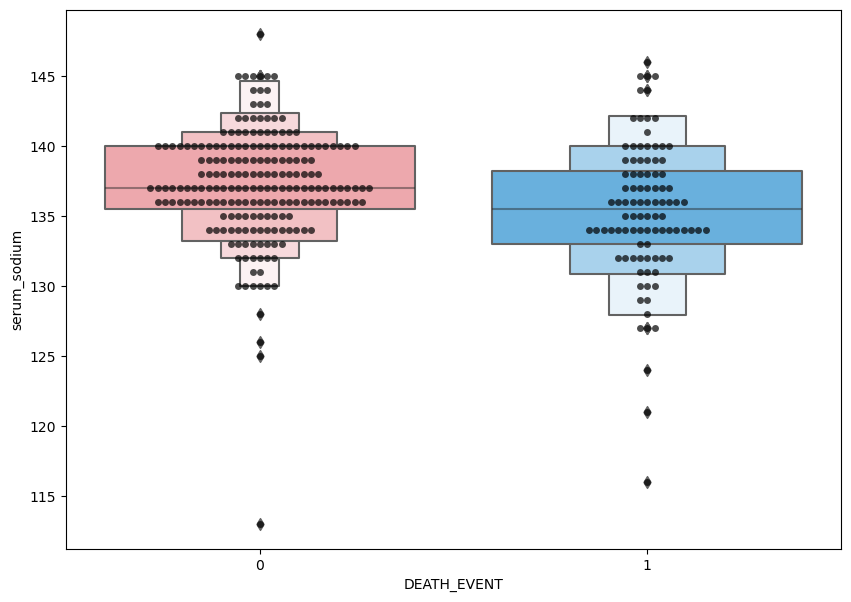

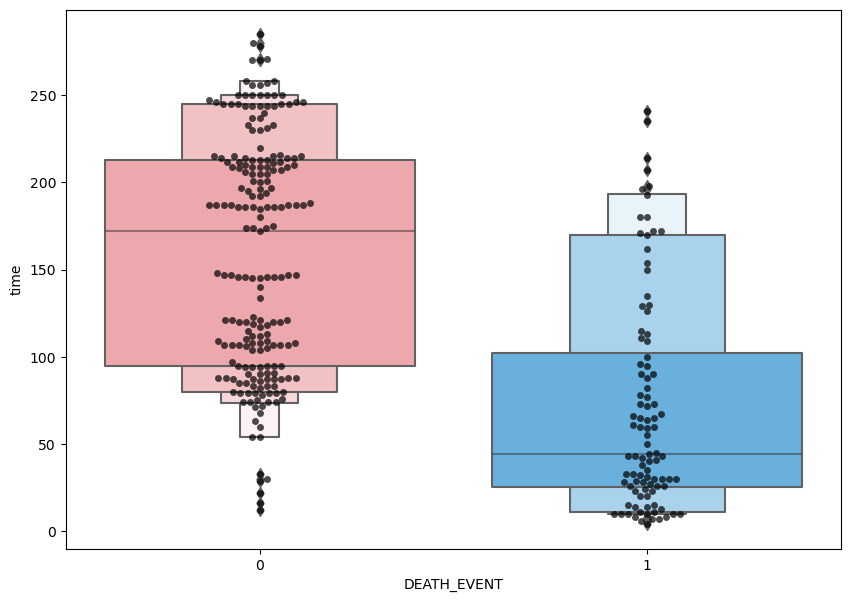

In [8]:
# Checking outlier

feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=dataset["DEATH_EVENT"], y=dataset[i], color="black", alpha=0.7)
    sns.boxenplot(x=dataset["DEATH_EVENT"], y=dataset[i], palette=cols)
    plt.show() 

#### Findings
In nearly all the features, there are some noticeable outliers. However, given the dataset's size and its relevance, we've chosen not to remove these outliers during data preprocessing, as doing so wouldn't result in any statistical anomalies.

<Axes: xlabel='time', ylabel='age'>

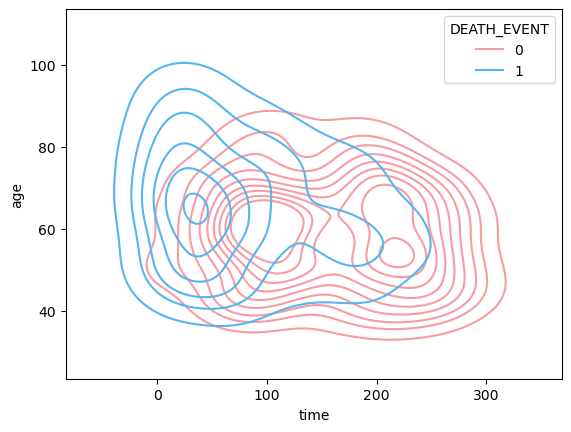

In [9]:
# Plot a chart for 'checking frequency' and 'age'

sns.kdeplot(x=dataset["time"], y=dataset["age"], 
            hue =dataset["DEATH_EVENT"], palette=cols)

#### Findings
With fewer follow-up days, patients typically passed away as they got older. The longer the follow-up period, the higher the likelihood of fatalities.

In [10]:
dataset1 = dataset.copy()

In [11]:
# Columns subset
columns1 = ['creatinine_phosphokinase', 
            'ejection_fraction', 'platelets', 'serum_creatinine',
            'serum_sodium', 'time']

# Function to classify by percentile
def classify_percentile(series):
    low, medium = np.percentile(series, [40, 70])

    def classify_value(val):
        if val <= low:
            return 'Low'
        elif low < val <= medium:
            return 'Medium'
        else:
            return 'High'

    return series.apply(classify_value)

# Apply the function to the specified columns
classified_columns = dataset1[columns1].apply(classify_percentile)

# Merge the classified columns back to the original dataset
for col in columns1:
    dataset1[col] = classified_columns[col]


In [12]:
columns2 = ['age']

# Function to classify by percentile
def classify_percentile2(series):
    low, medium = np.percentile(series, [40, 70])

    def classify_value2(val):
        if val <= low:
            return 'Young'
        elif low < val <= medium:
            return 'Middle'
        else:
            return 'Old'

    return series.apply(classify_value2)

# Apply the function to the specified columns
classified_columns2 = dataset1[columns2].apply(classify_percentile2)

# Merge the classified columns back to the original dataset
for col in columns2:
    dataset1[col] = classified_columns2[col]

# View the first few rows of the modified dataset
dataset1.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,Old,0,Medium,0,Low,1,Medium,High,Low,1,0,Low,1
1,Young,0,High,0,Medium,0,Medium,Medium,Low,1,0,Low,1
2,Middle,0,Low,0,Low,0,Low,Medium,Low,1,1,Low,1
3,Young,1,Low,0,Low,0,Low,High,Medium,1,0,Low,1
4,Middle,1,Low,1,Low,0,High,High,Low,0,0,Low,1


In [13]:
count_ones = dataset['DEATH_EVENT'].value_counts().get(1, 0)
print(count_ones)


96


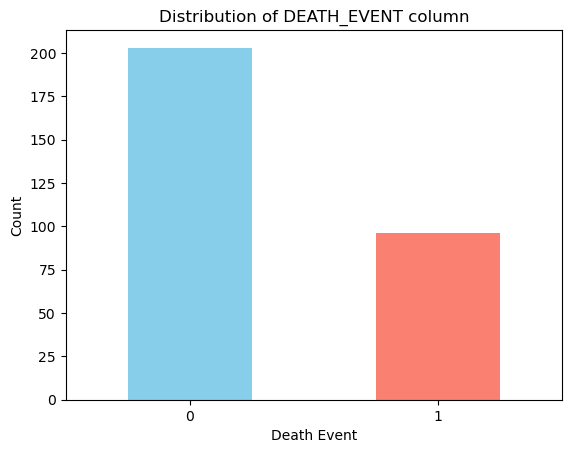

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame
dataset['DEATH_EVENT'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of DEATH_EVENT column')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.xticks(rotation=0) # This will keep the x-axis labels horizontal
plt.show()


In [15]:
# Visualizing multi-dimensional categorical data sets
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


class_dim = go.parcats.Dimension(
    values=dataset1["DEATH_EVENT"].values,
    label="Status",
    categoryarray=[0, 1],
    ticktext=['Living', 'Deceased']
)

age_dim = go.parcats.Dimension(
    values=dataset1["age"].values,
    label="Age"
)

anaemia_dim = go.parcats.Dimension(
    values=dataset1["anaemia"].values,
    label="Anaemia"
)

creatinine_phosphokinase_dim = go.parcats.Dimension(
    values=dataset1["creatinine_phosphokinase"].values,
    label="Creatinine phosphokinase"
)

diabetes_dim = go.parcats.Dimension(
    values=dataset1["diabetes"].values,
    label="Diabetes"
)

ejection_fraction_dim = go.parcats.Dimension(
    values=dataset1["ejection_fraction"].values,
    label="Ejection fraction"
)

high_blood_pressure_dim = go.parcats.Dimension(
    values=dataset1["high_blood_pressure"].values,
    label="High blood pressure"
)

platelets_dim = go.parcats.Dimension(
    values=dataset1["platelets"].values,
    label="Platelets"
)

serum_creatinine_dim = go.parcats.Dimension(
    values=dataset1["serum_creatinine"].values,
    label="Serum creatinine"
)

serum_sodium_dim = go.parcats.Dimension(
    values=dataset1["serum_sodium"].values,
    label="Serum sodium"
)

sex_dim = go.parcats.Dimension(
    values=dataset1["sex"].values,
    label="Sex"
)

smoking_dim = go.parcats.Dimension(
    values=dataset1["smoking"].values,
    label="Smoking"
)

time_dim = go.parcats.Dimension(
    values=dataset1["time"].values,
    label="Time"
)


In [16]:
# Create parcats trace
color = [1 if i==1 else 0 for i in dataset["DEATH_EVENT"]]
colorscale = [[0, "#f89ca3"], [1, "#56b5f0"]];
dataset2 = [
    go.Parcats(
        dimensions=[class_dim, age_dim, anaemia_dim,
                    creatinine_phosphokinase_dim, diabetes_dim,
                    ejection_fraction_dim, high_blood_pressure_dim,
                    platelets_dim, serum_creatinine_dim, serum_sodium_dim,
                    sex_dim, smoking_dim, time_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 14, 'family': 'Times'},#'color':'rgba(255,255,255,0)'},
        tickfont={'size': 14, 'family': 'Times'},
        arrangement='freeform',   
    )
]


layout = go.Layout(
    width=1000,  # Set the width of the chart
    height=500,  # Set the height of the chart
    margin=go.layout.Margin(
        l=25,  # left margin
        r=30,  # right margin
        b=100, # bottom margin
        t=100, # top margin
))

# Display the chart with the specified layout
iplot({'data': dataset2, 'layout': layout})

In [26]:
# Export chart to powerpoint

#import chart_studio
#import chart_studio.plotly as py
#import chart_studio.tools as tls

#username = 'Alicele'
#api_key = 'fqu9V0Qm5CbXTjeIk9fh'

#chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
#py.plot(dataset2, filename='HF parcat', auto_open=False)



# Data preparation

In [18]:
# Assigning independent and dependent variables 

x=dataset.drop(["DEATH_EVENT"],axis=1) #Independent
y=dataset["DEATH_EVENT"] #Dependent

In [19]:
# Configuring a standard scaler for the attributes and examining 
# it subsequently

col_names = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_scaled= s_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=col_names)   
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


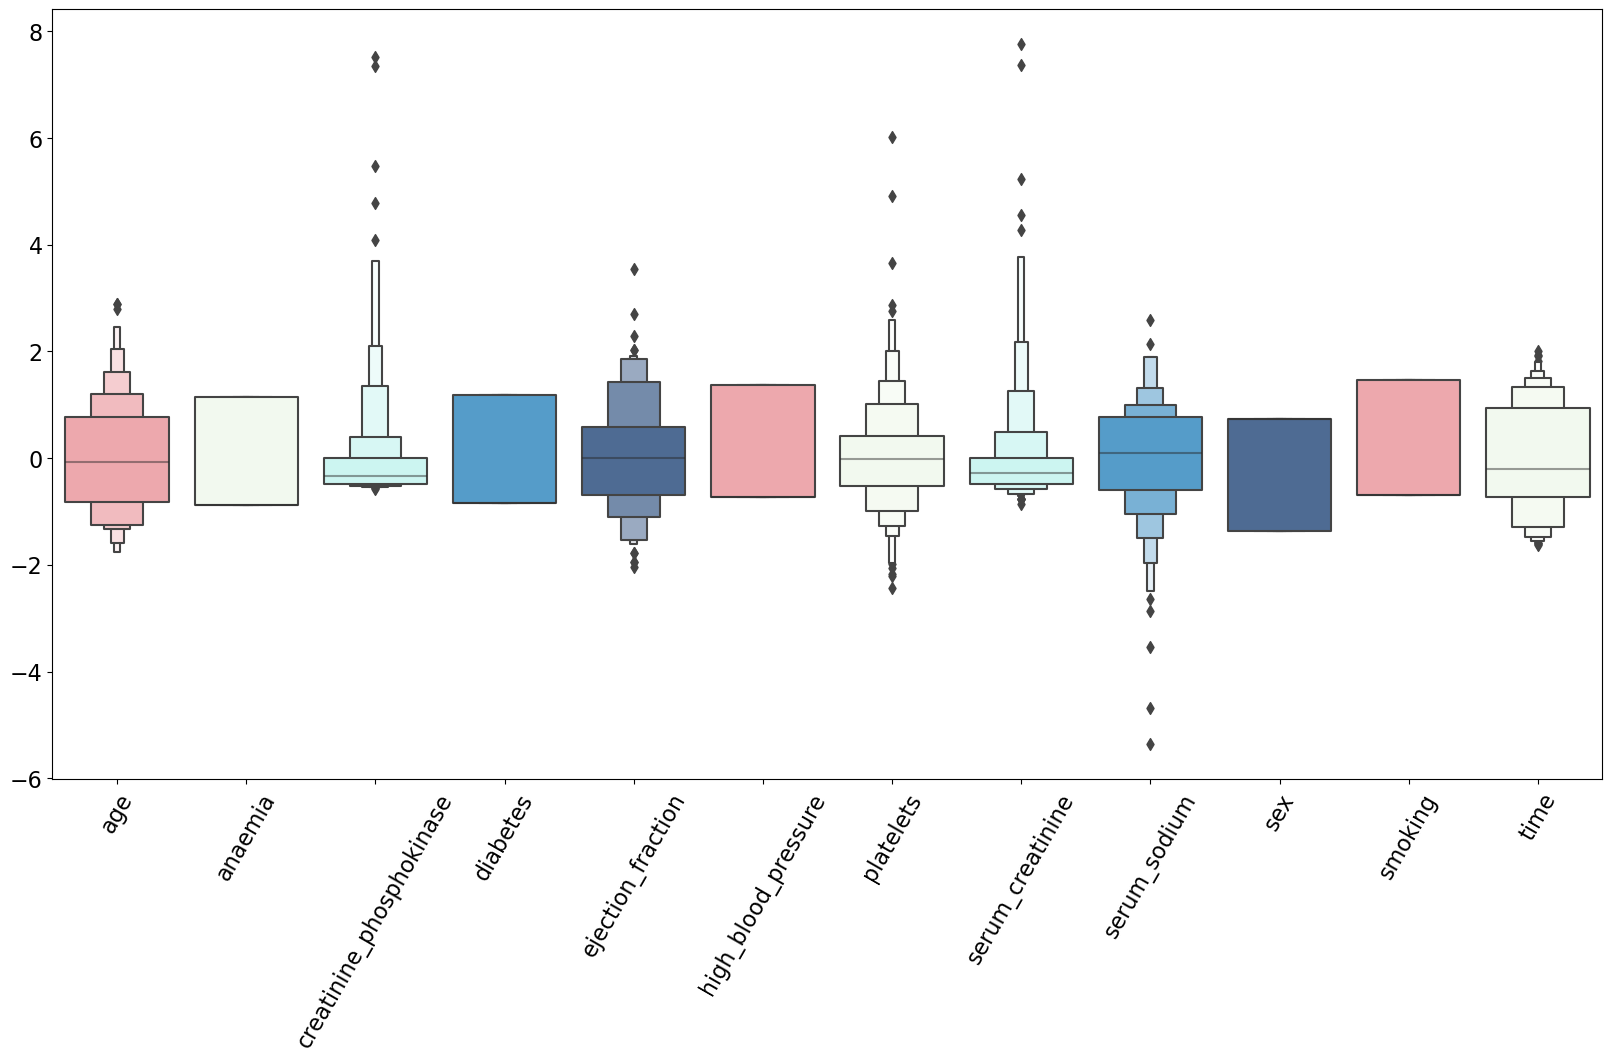

In [20]:
# Visualize the scaled attributes

colors =["#f89ca3","#f1faee","#c5fcf7","#42a1dc","#43699e"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = x_scaled,palette = colors)
plt.yticks(fontsize=16)
plt.xticks(rotation=60, fontsize=16)
plt.show()

In [21]:
#spliting variables into training and test set
x_train, x_test, y_train,y_test = train_test_split(x_scaled,y,
                                                   test_size=0.30,
                                                   random_state=25)


# Model: Support Vector Machine (SVM)

In [22]:
# Initializing the SVM algorithm 
model_SVM=svm.SVC()

# Fitting the model 
#model_SVM.fit (x_train, y_train)

# Performing prediction on the testing data
#y_pred = model_SVM.predict(x_test)

# Getting the accuracy score 
#print('Accuracy score of SVM model is', round(model_SVM.score(x_test, y_test), 2))


In [52]:
# [Revised] Tunning SVM model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [10,20,8],
    'gamma': [0.01, 0.02, 0.008],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize SVM classifier
model_SVM=svm.SVC()

# Initialize Grid Search
grid_search = GridSearchCV(model_SVM, param_grid, refit=True, verbose=0, cv=5) # Using 5-fold cross validation
grid_search.fit(x_train, y_train)

# Print best parameters
print(grid_search.best_params_)

# Predict using the best model (best estimator)
y_pred = grid_search.best_estimator_.predict(x_test)

# Compute the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy:.4f}")


{'C': 20, 'gamma': 0.02, 'kernel': 'sigmoid'}
Accuracy with best parameters: 0.8000


In [59]:
# Fitting the model optimal parameter

from sklearn.svm import SVC

# Initialize the SVM with the best parameters
svm_best = SVC(C=20, gamma=0.02, kernel='sigmoid')

# Fit the SVM model on the training data
svm_best.fit(x_train, y_train)


y_pred = svm_best.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy:.4f}")


Accuracy with best parameters: 0.8000


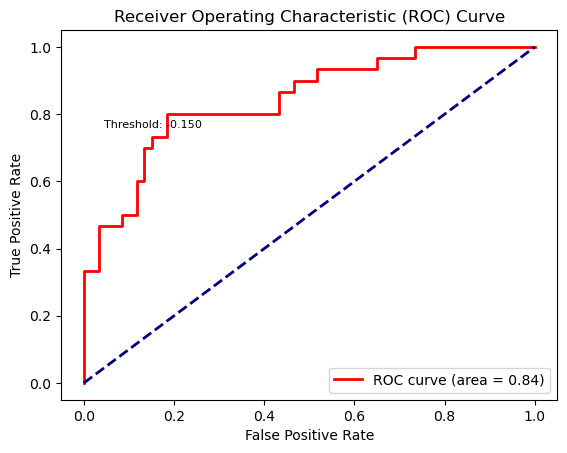

In [60]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import svm

# Get the decision function scores
y_scores = svm_best.decision_function(x_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# Calculate Youden's J statistic
J = tpr - fpr
optimal_idxs = np.where(J == np.max(J))  # get indices of optimal thresholds
optimal_thresholds = thresholds[optimal_idxs]
optimal_fpr = fpr[optimal_idxs]
optimal_tpr = tpr[optimal_idxs]

# Plot ROC curve
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # diagonal line for random classifier

# Annotate optimal thresholds
for fpr_, tpr_, thresh_ in zip(optimal_fpr, optimal_tpr, optimal_thresholds):
    plt.annotate(f'Threshold: {thresh_:.3f}', 
                 (fpr_, tpr_), 
                 textcoords="offset points", 
                 xytext=(-10,-10), 
                 ha='center',
                 fontsize=8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [61]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
        0.08333333, 0.08333333, 0.11666667, 0.11666667, 0.13333333,
        0.13333333, 0.15      , 0.15      , 0.18333333, 0.18333333,
        0.43333333, 0.43333333, 0.46666667, 0.46666667, 0.51666667,
        0.51666667, 0.65      , 0.65      , 0.73333333, 0.73333333,
        1.        ]),
 array([0.        , 0.03333333, 0.33333333, 0.33333333, 0.46666667,
        0.46666667, 0.5       , 0.5       , 0.6       , 0.6       ,
        0.7       , 0.7       , 0.73333333, 0.73333333, 0.8       ,
        0.8       , 0.86666667, 0.86666667, 0.9       , 0.9       ,
        0.93333333, 0.93333333, 0.96666667, 0.96666667, 1.        ,
        1.        ]),
 array([ 5.72574944,  4.72574944,  2.05106034,  1.72621308,  1.01704254,
         0.6354789 ,  0.62705499,  0.55815186,  0.45030673,  0.3806181 ,
         0.18556647,  0.18504884,  0.09419004, -0.0367162 , -0.15012987,
        -0.92818708, -1.00529844, -1.04833191, -1.2217897

In [62]:
# SVM - Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        60
           1       0.69      0.73      0.71        30

    accuracy                           0.80        90
   macro avg       0.77      0.78      0.78        90
weighted avg       0.80      0.80      0.80        90



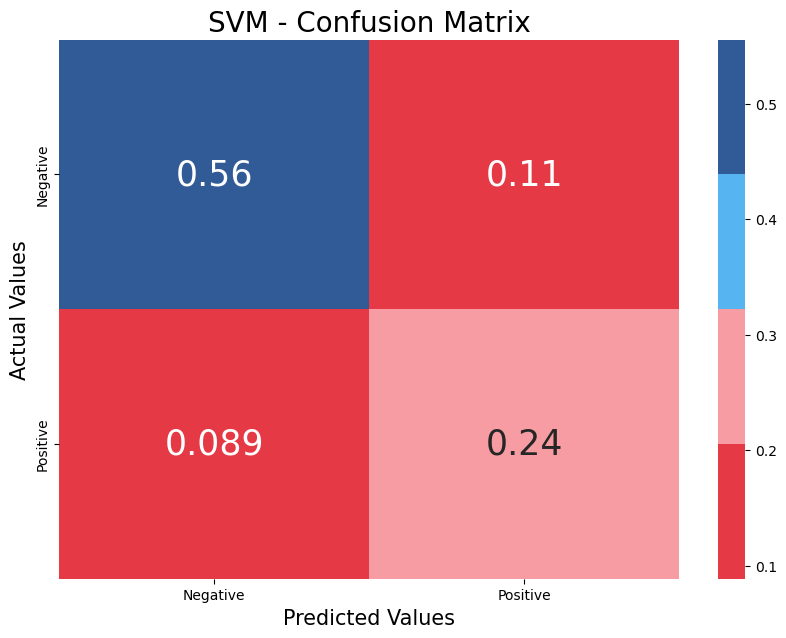

In [63]:
# SVM - Confusion matrix
custom_colors = ["#e63946", "#f89ca3", "#56b5f0", '#305b96']
plt.subplots(figsize=(10,7))
cmx = confusion_matrix(y_test, y_pred)
sns.heatmap(cmx/np.sum(cmx), cmap=custom_colors, annot=True, annot_kws={'size':25},
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'])

# Set the labels for the x-axis and y-axis
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.title('SVM - Confusion Matrix', fontsize=20)
plt.show()


Interpretation - SVM Confusion Matrix

+ Positive case = Deceased case by failure = 1
+ Negative case = Living case by failure = 0

True Negative (TN) - 0.56: This is the proportion of actual negative case (0) which are correctly predicted as negative by the SVM. In other words, 56% of the total instances were correctly identified as class 0.

False Positive (FP) - 0.11: This is the proportion of actual negative cases (0) which are incorrectly predicted as positive (1) by the SVM. In simpler terms, 11% of the total instances were falsely classified as class 1 when they actually belong to class 0.

False Negative (FN) - 0.1: This is the proportion of actual positive cases (1) which are incorrectly predicted as negative (0) by the SVM. That means 10% of the total instances were falsely classified as class 0 when they actually belong to class 1.

True Positive (TP) - 0.24: This is the proportion of actual positive cases (1) which are correctly predicted as positive by the SVM. This means 24% of the total instances were correctly identified as class 1.


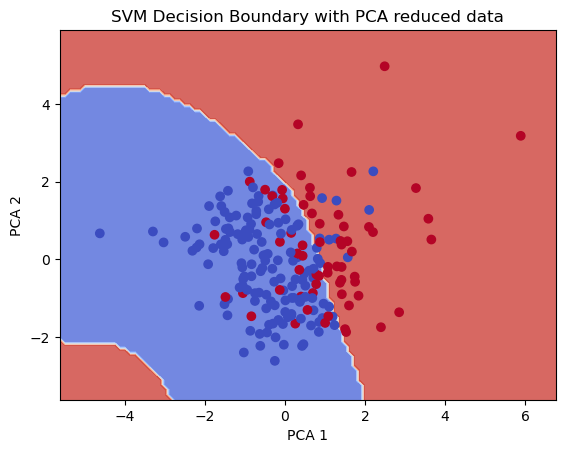

In [64]:
# [Revised]

from sklearn.decomposition import PCA

# Reduce the training data to 2 dimensions using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Fit SVM on reduced data
svm_pca = SVC(C=1, gamma=0.1, kernel='rbf')
svm_pca.fit(x_train_pca, y_train)

# Create the mesh grid for visualization
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in the mesh grid
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary with PCA reduced data')
plt.show()


# Model: Artificial Neural Network (ANN) 

In [66]:
# Setting stopping resolution

stopping_res = callbacks.EarlyStopping(
    min_delta=0.001, 
    # minimium amount of change to count as an improvement
    patience=20, 
    restore_best_weights=True)


In [67]:
# Buidling ANN model by Keras API
model_ANN = Sequential()

model_ANN.add(Dense(units = 16, kernel_initializer = 'uniform', 
                activation = 'relu', input_dim = 12))
model_ANN.add(Dense(units = 8, kernel_initializer = 'uniform', 
                activation = 'relu'))
model_ANN.add(Dropout(0.25))
model_ANN.add(Dense(units = 8, kernel_initializer = 'uniform', 
                activation = 'relu'))
model_ANN.add(Dropout(0.5))
model_ANN.add(Dense(units = 1, kernel_initializer = 'uniform', 
                activation = 'sigmoid'))


In [95]:
# Model ANN architecture
import keras
from keras.models import Sequential
from keras.layers import Dense
import netron
from IPython.display import IFrame


# Save the model to a file.
model_ANN.save("model_ANN.h5")

# Start netron to visualize the model. 
# This will open up a browser window/tab with the visualization.
netron.start("model_ANN.h5", browse=False)

# Display within the notebook.
IFrame(src="http://localhost:8080", width="100%", height=500)

Serving 'model_ANN.h5' at http://localhost:8081


In [85]:
# [Revised] Tunning ANN model

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import callbacks
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def create_model_ANN(optimizer='rmsprop'):
    model_ANN = Sequential()
    model_ANN.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
    model_ANN.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model_ANN.add(Dropout(0.25))
    model_ANN.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    model_ANN.add(Dropout(0.5))
    model_ANN.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model_ANN.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model_ANN

model_ANN = create_model_ANN()

# Setting the Early Stopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

# Wrap the model using a function
def fit_and_evaluate(optimizer='rmsprop', epochs=10, batch_size=32):
    model_ANN = create_model_ANN(optimizer)
    history = model_ANN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[early_stop], validation_split=0.2)
    validation_accuracy = np.mean(history.history['val_accuracy'])
    return validation_accuracy

# Grid for parameters
param_dist = {
    'optimizer': ['adam', 'sgd', 'rmsprop', 'adagrad'],
    'epochs': [200,300,400],
    'batch_size': [60,70]
}

# Search the best parameters
best_acc = 0
best_params = None

for optimizer in param_dist['optimizer']:
    for epochs in param_dist['epochs']:
        for batch_size in param_dist['batch_size']:
            acc = fit_and_evaluate(optimizer, epochs, batch_size)
            if acc > best_acc:
                best_acc = acc
                best_params = {'optimizer': optimizer, 'epochs': epochs, 'batch_size': batch_size}

                
model_ANN_best = create_model_ANN(best_params['optimizer'])
history_best = model_ANN_best.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0, callbacks=[early_stop])

print(f"Best Validation Accuracy: {best_acc:.4f}")
print("Best Parameters:", best_params)


Best Validation Accuracy: 0.7405
Best Parameters: {'optimizer': 'rmsprop', 'epochs': 200, 'batch_size': 60}


__How we set up parameters

+ We decided to tune the model by 03 factors: number of epoch, batch size and optimizer

+ Initially, we based on the first attempt (the one we presented in class) as a benchmark, came up with the set of closing values.

+ After many trials, we settled with the one that give us the satisfied accuracy. 

In [86]:
# [Revised] Training the ANN after tunning with updated parameters

model_ANN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_ANN = model_ANN.fit(x_train, y_train, batch_size = 60, 
                            epochs = 200, validation_split=0.2)



Epoch 1/200
3/3 [==============================] - 0s 47ms/step - loss: 0.6926 - accuracy: 0.6228 - val_loss: 0.6900 - val_accuracy: 0.8333
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.6467 - val_loss: 0.6881 - val_accuracy: 0.8333
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.6467 - val_loss: 0.6862 - val_accuracy: 0.8333
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6898 - accuracy: 0.6467 - val_loss: 0.6845 - val_accuracy: 0.8333
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.6467 - val_loss: 0.6827 - val_accuracy: 0.8333
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.6467 - val_loss: 0.6809 - val_accuracy: 0.8333
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.6467 - val_loss: 0.6787 - val_accuracy: 0.8333
Epoch 8/200
3/3 [=========

3/3 [==============================] - 0s 7ms/step - loss: 0.4868 - accuracy: 0.6467 - val_loss: 0.3154 - val_accuracy: 0.8333
Epoch 60/200
3/3 [==============================] - 0s 8ms/step - loss: 0.5002 - accuracy: 0.6467 - val_loss: 0.3127 - val_accuracy: 0.8333
Epoch 61/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4893 - accuracy: 0.6467 - val_loss: 0.3094 - val_accuracy: 0.8333
Epoch 62/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4671 - accuracy: 0.6467 - val_loss: 0.3034 - val_accuracy: 0.8333
Epoch 63/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.6467 - val_loss: 0.2998 - val_accuracy: 0.8333
Epoch 64/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4898 - accuracy: 0.6467 - val_loss: 0.2980 - val_accuracy: 0.8333
Epoch 65/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4956 - accuracy: 0.6467 - val_loss: 0.2982 - val_accuracy: 0.8333
Epoch 66/200
3/3 [===============

3/3 [==============================] - 0s 7ms/step - loss: 0.4074 - accuracy: 0.8443 - val_loss: 0.2547 - val_accuracy: 0.9048
Epoch 118/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4432 - accuracy: 0.8383 - val_loss: 0.2569 - val_accuracy: 0.9048
Epoch 119/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4095 - accuracy: 0.8383 - val_loss: 0.2573 - val_accuracy: 0.9048
Epoch 120/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4293 - accuracy: 0.8323 - val_loss: 0.2585 - val_accuracy: 0.9048
Epoch 121/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4182 - accuracy: 0.8204 - val_loss: 0.2563 - val_accuracy: 0.9048
Epoch 122/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4080 - accuracy: 0.8084 - val_loss: 0.2574 - val_accuracy: 0.9048
Epoch 123/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4092 - accuracy: 0.8204 - val_loss: 0.2557 - val_accuracy: 0.9048
Epoch 124/200
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.3498 - accuracy: 0.8802 - val_loss: 0.2679 - val_accuracy: 0.8810
Epoch 176/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3308 - accuracy: 0.8743 - val_loss: 0.2662 - val_accuracy: 0.8810
Epoch 177/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3309 - accuracy: 0.8802 - val_loss: 0.2643 - val_accuracy: 0.9048
Epoch 178/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3355 - accuracy: 0.8743 - val_loss: 0.2657 - val_accuracy: 0.9048
Epoch 179/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3479 - accuracy: 0.8443 - val_loss: 0.2694 - val_accuracy: 0.9048
Epoch 180/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.8683 - val_loss: 0.2726 - val_accuracy: 0.8810
Epoch 181/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3224 - accuracy: 0.8862 - val_loss: 0.2700 - val_accuracy: 0.9048
Epoch 182/200
3/3 [========

In [87]:
# Getting the accuracy score 
loss, accuracy = model_ANN.evaluate(x_test, y_test)
print('Accuracy score of ANN model is', round(accuracy, 2))


3/3 [==============================] - 0s 1ms/step - loss: 0.7076 - accuracy: 0.7667
Accuracy score of ANN model is 0.77


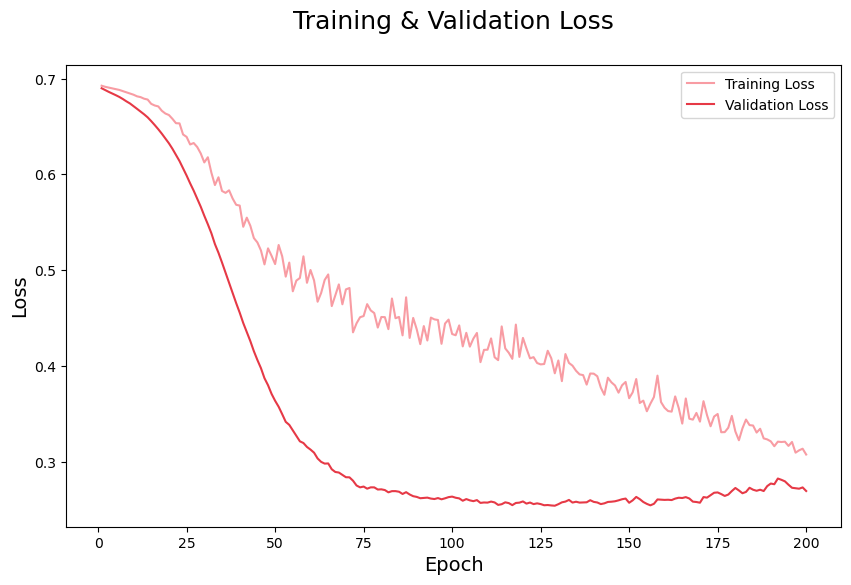

In [89]:
# Visualize Training & Validation loss

validation_loss = history_ANN.history['val_loss'] 
train_loss = history_ANN.history['loss']
epoch = range(1,201)

fig, ax = plt.subplots(figsize=(10, 6))

fig.set_facecolor('white')
ax.set_facecolor('white')
plt.gca().set_facecolor('white')
sns.lineplot(x=epoch, y=train_loss, label='Training Loss', color='#f89ca3')
sns.lineplot(x=epoch, y=validation_loss, label='Validation Loss', color='#e63946')
plt.title('Training & Validation Loss\n', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

plt.show()


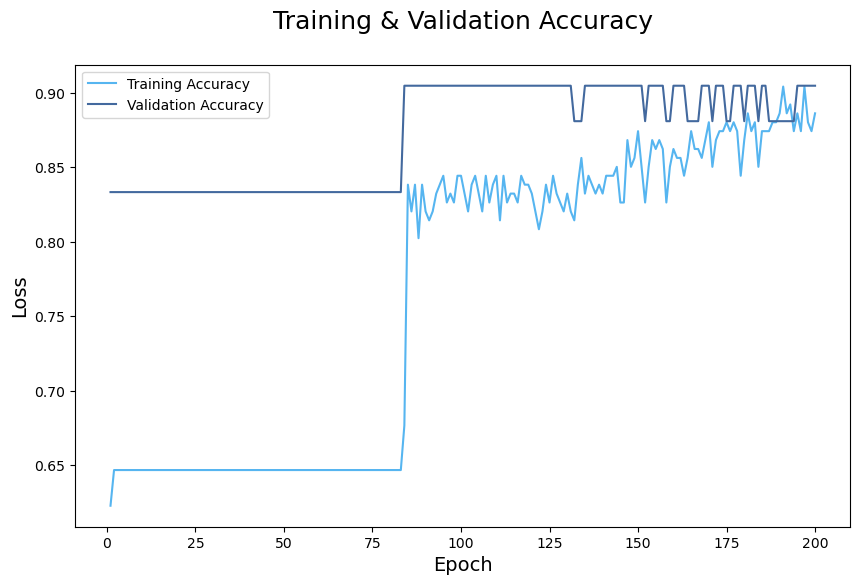

In [90]:
# Visualize Training & Validation accuracy

validation_acc = history_ANN.history['val_accuracy'] 
train_acc = history_ANN.history['accuracy']
epoch = range(1, 201)

fig, ax = plt.subplots(figsize=(10, 6))

fig.set_facecolor('white')
ax.set_facecolor('white')
plt.gca().set_facecolor('white')
sns.lineplot(x=epoch, y=train_acc, label='Training Accuracy', color="#56b5f0")
sns.lineplot(x=epoch, y=validation_acc, label='Validation Accuracy', color= '#43699e')
plt.title('Training & Validation Accuracy\n', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

plt.show()

In [91]:
# Performing prediction on testing data

y_pred_prob = model_ANN.predict(x_test)
y_pred = (y_pred_prob > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 901us/step


In [92]:
# ANN- Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        60
           1       0.64      0.70      0.67        30

    accuracy                           0.77        90
   macro avg       0.74      0.75      0.74        90
weighted avg       0.77      0.77      0.77        90



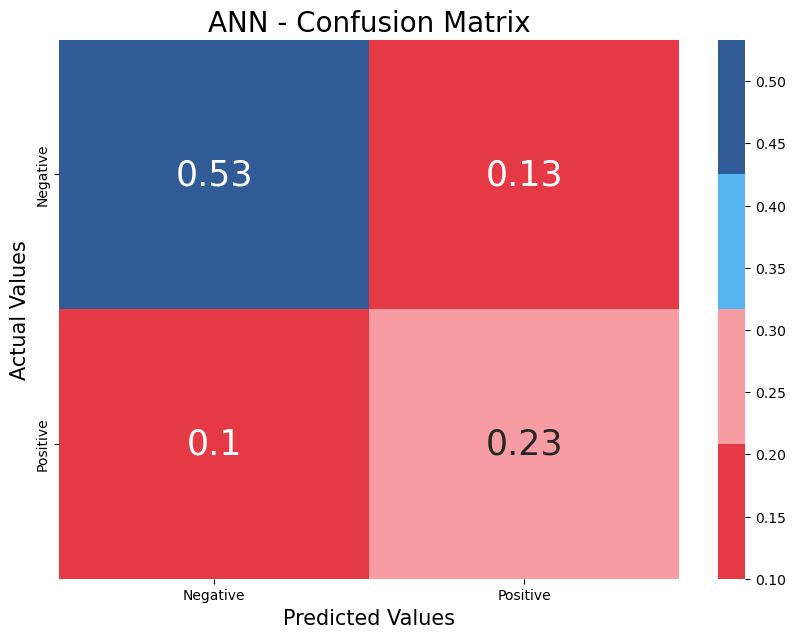

In [93]:
# ANN - Confusion matrix
custom_colors = ["#e63946", "#f89ca3", "#56b5f0", '#305b96']  
plt.subplots(figsize=(10,7))
cmx = confusion_matrix(y_test, y_pred)
sns.heatmap(cmx/np.sum(cmx), cmap=custom_colors, annot=True, annot_kws={'size':25},
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'])

# Set the labels for the x-axis and y-axis
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.title('ANN - Confusion Matrix', fontsize=20)
plt.show()


Interpretation - ANN Confusion Matrix

+ Positive case = Deceased case by failure = 1
+ Negative case = Living case by failure = 0

True Positive (TP): 0.23 This means that 23% of the total samples were correctly predicted as class 1 (or positive class).

True Negative (TN): 0.53 This indicates that 53% of the total samples were correctly predicted as class 0 (or negative class).

False Positive (FP): 0.13 This implies that 13% of the samples were incorrectly predicted as class 1 when they actually belong to class 0.

False Negative (FN): 0.10 This means that 10% of the samples were incorrectly predicted as class 0 when they actually belong to class 1.


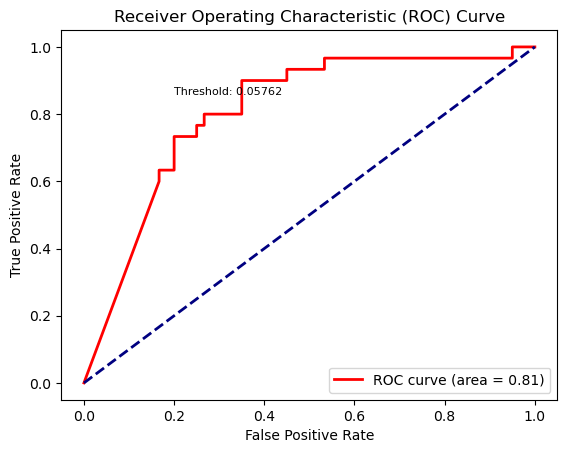

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC 
roc_auc = auc(fpr, tpr)

# Calculate Youden's J statistic
J = tpr - fpr
optimal_idxs = np.where(J == np.max(J))  # get indices of optimal thresholds
optimal_thresholds = thresholds[optimal_idxs]
optimal_fpr = fpr[optimal_idxs]
optimal_tpr = tpr[optimal_idxs]

# Plot ROC curve
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # diagonal line for random classifier

# Annotate optimal thresholds
for fpr_, tpr_, thresh_ in zip(optimal_fpr, optimal_tpr, optimal_thresholds):
    plt.annotate(f'Threshold: {thresh_:.5f}', 
                 (fpr_, tpr_), 
                 textcoords="offset points", 
                 xytext=(-10,-10), 
                 ha='center',
                 fontsize=8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [96]:
fpr, tpr, thresholds

(array([0.        , 0.16666667, 0.16666667, 0.2       , 0.2       ,
        0.2       , 0.25      , 0.25      , 0.26666667, 0.26666667,
        0.35      , 0.35      , 0.45      , 0.45      , 0.53333333,
        0.53333333, 0.95      , 0.95      , 1.        ]),
 array([0.        , 0.6       , 0.63333333, 0.63333333, 0.7       ,
        0.73333333, 0.73333333, 0.76666667, 0.76666667, 0.8       ,
        0.8       , 0.9       , 0.9       , 0.93333333, 0.93333333,
        0.96666667, 0.96666667, 1.        , 1.        ]),
 array([1.57750607e+00, 5.77506006e-01, 5.76478422e-01, 5.46862960e-01,
        5.42436600e-01, 4.20732617e-01, 3.00636023e-01, 2.86340594e-01,
        2.71690965e-01, 1.50763094e-01, 8.66183713e-02, 5.76203167e-02,
        8.99032969e-03, 8.61363020e-03, 1.55534863e-03, 1.54484552e-03,
        1.25281318e-07, 1.16852114e-07, 3.07432906e-08], dtype=float32))

# [Revised] Conclusion

After tunning, SVM is still slightly out edge ANN which indicates that this model well handle this data than ANN does. 